<a href="https://colab.research.google.com/github/amrita1990/amrita1990/blob/main/Linear%20Regression%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [3]:
import torch.nn as nn

In [2]:
import numpy as np
from sklearn import datasets

In [4]:
import matplotlib.pyplot as plt


In [6]:
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [9]:
X=torch.from_numpy(x_numpy.astype(np.float32))
Y=torch.from_numpy(y_numpy.astype(np.float32))

In [12]:
Y

tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
         3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
        -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
         6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
        -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
        -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
        -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
        -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
         1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
         7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
        -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
         6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
         5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
        -7.5602e+01,  1.9713e+01, -7.1601e+01, -1.9

In [22]:
Y=Y.view(Y.shape[0],1)

In [24]:
n_samples,n_features=X.shape

In [27]:
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)


In [29]:
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

epoch: 10, loss = 4362.3633
epoch: 20, loss = 3254.2109
epoch: 30, loss = 2452.7329
epoch: 40, loss = 1872.4219
epoch: 50, loss = 1451.8207
epoch: 60, loss = 1146.6879
epoch: 70, loss = 925.1314
epoch: 80, loss = 764.1308
epoch: 90, loss = 647.0485
epoch: 100, loss = 561.8470


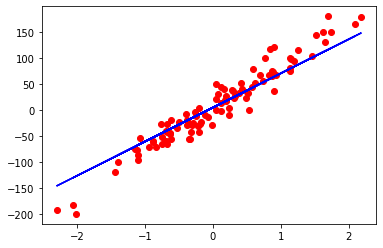

In [31]:
num_epochs=100

for epoch in range(num_epochs):
     #forward pass and loss
      y_predicted=model(X)
      loss=criterion(y_predicted,Y)

      #BACKWARD
      loss.backward()

      #update
      optimizer.step()

      #zero grad
      optimizer.zero_grad()

      if (epoch+1) % 10==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

  #plot
predicted=model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()
